Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
parent_directory = os.path.dirname(os.getcwd())
sys.path.append(parent_directory)
from parent_model import RNN
from trainer import Trainer
import util

In [2]:
SEQUENCE_LENGTH = 25

MODEL_PARAMS = {
    'input_dim': 1,
    'hidden_dim': 64,
    'output_dim': 1,
    'sequence_length': SEQUENCE_LENGTH,
}

TRAJECTORY_PARAMS = {
    'sequence_length': SEQUENCE_LENGTH,
    'step_size': .04,
    'std_dev': .125
}

LEARNING_RATE = 1e-4

In [3]:
class NoiseGenerator(object):
    def __init__(self, sequence_length, step_size, std_dev):
        self.sequence_length = sequence_length
        self.step_size = step_size
        self.std_dev = std_dev
        
    def generate_trajectory(self, batch_size):
        output_shape = (batch_size, self.sequence_length, 1)
        X = np.random.normal(0, self.std_dev, output_shape).astype(np.float32)
        y = np.cumsum(X, axis=1)
        return None, X, y

In [4]:
net = RNN(**MODEL_PARAMS)
generator = NoiseGenerator(**TRAJECTORY_PARAMS)
trainer = Trainer(net, generator, LEARNING_RATE)

Train Model

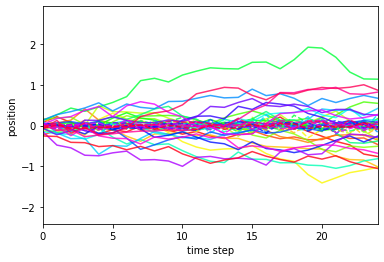

In [5]:
_, X, y = generator.generate_trajectory(25)
util.plot_sequence(y, net(X))

Epoch 0. loss = 0.1797279268503189
Epoch 100. loss = 0.026408331468701363
Epoch 200. loss = 0.011974457651376724
Epoch 300. loss = 0.006681396625936031
Epoch 400. loss = 0.004095148295164108
Epoch 500. loss = 0.002604149514809251
Epoch 600. loss = 0.0018518664874136448
Epoch 700. loss = 0.00117386260535568
Epoch 800. loss = 0.0008172104135155678
Epoch 900. loss = 0.0015683162491768599


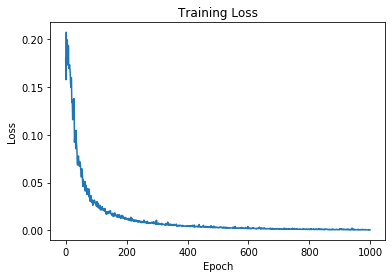

In [6]:
trainer.train(n_epochs=1000)
util.plot_training_loss(trainer)

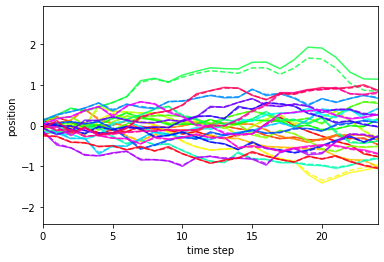

In [7]:
util.plot_sequence(y, net(X))